## Matplotlib

Es una librería de Python para la creación de visualizaciones interactivas, animadas y estáticas.

## Por qué Matplotlib puede ser dificil de usar?

- La librería en sí es grande. Con algo así como 70K líneas de código.
- Matplotlib tiene distintas interfaces (maneras de construir una figura) y es capaz de interactuar con varios backends.
- La documentación es bastante completa pero muchas veces desactualizada.


## Historia

Su desarrollo comenzó en 2003 por John D. Hunter, inspirado en Matlab.

[matplotlib: Lessons from middle](https://www.youtube.com/watch?v=e3lTby5RI54)


# Arquitectura de Matplotlib

Matplotlib tiene una arquitectura de 3 capas, organizadas como un *stack*:
* backend
* artist
* scripting

*Scripting* es la API que usamos para crear los gráficos.

*Artist* es la capa que realmente crea los gráficos internamente.

*Backend* es donde el gráfico se muestra.


## Capa backend

Es la capa de más bajo nivel, donde los gráficos se muestran en algún dispositivo de salida. Puede ser cualquiera de las interfaces de usuario que soporta Matplotlib.

Existen 2 tipos:

* user interface back-ends o interactive backends (`pygtk`, `wxpython`, `tkinter`, `qt4`, `macosx`)
* hard-copy or non-interactive backends (.png, .svg, .pdf y .ps)



## Capa Artist

La capa del medio del stack. Cada elemento de una figura que vemos en un gráfico es un objeto artist. Esta capa provee una API pensada para desarrolladores Python, brindando flexibilidad y permitiendo la creación de complejos dashboards.

## Capa Scripting

Es también llamada la api `pylot` y está pensada para usuarios finales y no requiere mucha experiencia en desarrollo.

## Elementos de una figura

Los objetos de más alto nivel, que contiene todos los elementos del gráfico se salida se llama `figure`. Pueden usarse varios gráficos de diferentes maneras para formar una figura. Cada uno de los elementos de una figura es personalizable.

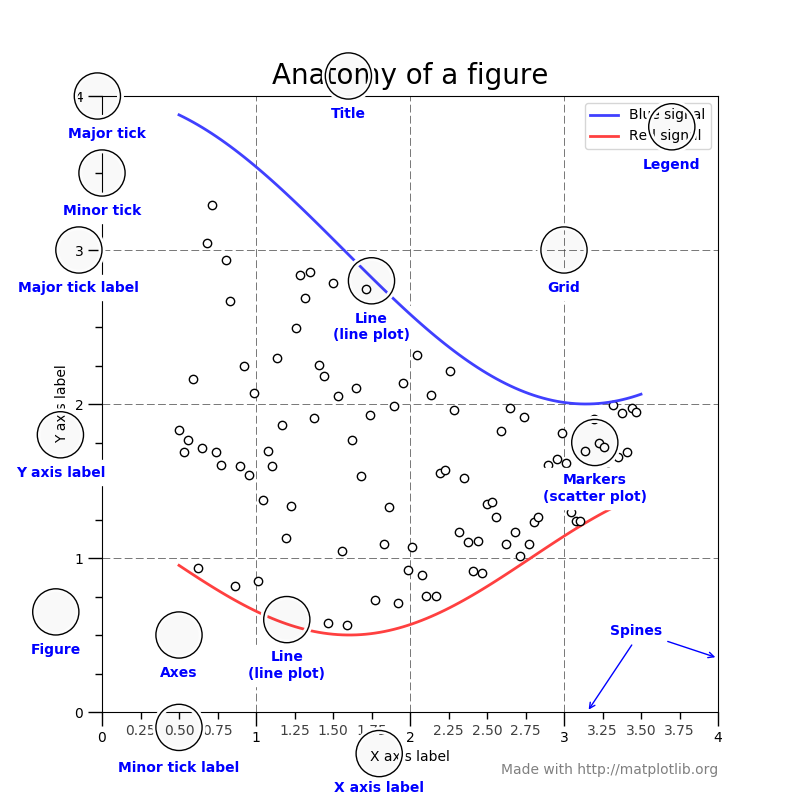




## Axes

Los `axes` son una sub-sección de una figura, donde se imprime el gráfico. Un `axes` tiene un **title**, un **x-label** y un **y-label**. Una figura puede tener muchos `axes`, cada uno representando uno o más gráficos. En la figura que acabamos de ver, hay un solo axes y dos gráficos de línea, uno en color azul y uno en color rojo.

## Axis (ejes)

Líneas numeradas representando la escala de los gráficos. Los gráficos de 2 dimensiones tienen un eje x y un eje y. Los gráficos de 3 dimensiones tienen un eje x, un eje y y un eje z.
"Axes" es plural de "axis", así que hay que tener cuidado con el contexto. 


## Label

El nombre dado a los elementos de una figura. Por ej, x-axis label, y-axis label, graph-label (blue signal/red signal en el gráfico anterior), etc.

## Legend

Cuándo hay muchos gráficos en un mismo axes (como en el ejemplo anterior) cada uno de ellos tiene su propia etiqueta y esas etiquetas son representadas como una leyenda.

## Title

El nombre dado a cada uno de los `axes`. La `figure` también tiene su propio título, útil cuando una figura tiene varios axes con sus propios títulos. La figura que vimos tiene un solo título para axes y la figura.

## Ticklabels

Cada eje (x, y o z) comprenderá un rango de valores divididos en muchos bins de igual tamaño. Los bins son elegidos a 2 niveles.
En la figura anterior, la escala del eje x está dividido en 4 major bins (0-1, 1-2, 2-3 y 3-4) y cada uno de los major bins está dividido en 4 minor bins (0-0.25, 0.25-0.5, 0.5-0.75). Los **ticks** de los **major bins** son llamados **major ticks** y tienen **major ticklabels**. La misma convención de nombres se sigue para los **minor bins**.

## Spines

Definen los límites de la figura. Hay cuatro por cada axes(arriba, abajo, a la izquierda y a la derecha)

## Grid (grilla)

Para facilitar la legibilidad de las coordenadas en varios puntos del gráfico, su área se divide en una grilla. 

# Practica

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Vamos a dibujar una recta:

In [ ]:
plt.plot([1.5, 3.0])

Vamos a agregar las etiquetas a los ejes y ponerle un título al gráfico:

Text(0, 0.5, 'Eje y')

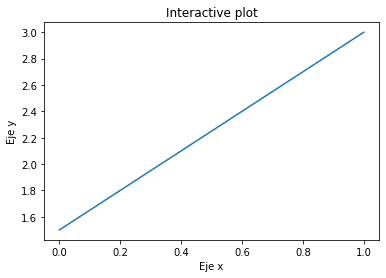

In [ ]:
plt.plot([1.5, 3.0])
plt.title("Interactive plot")
plt.xlabel("Eje x")
plt.ylabel("Eje y")

## Aclaraciones importantes

* `plt.plot([1.5, 3.0])` dibuja una línea conectando dos puntos (0, 1.5) y (1.0, 3.0)

* el método `plot` recibe 2 argumentos, para los ejes x e y respectivamente. Si se pasa solo un argeumento, lo toma como las coordenadas del eje y, para el eje x toma la longitud del argumento provisto (lista de Python, array de Numpy o DataFrame de Panda)

**Ejercicio**: crear un nuevo gráfico con dos líneas ¿qué pasa con los colores de las líneas?

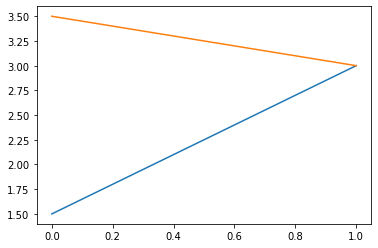

In [ ]:
plt.plot([1.5, 3.0])
plt.plot([3.5, 3.0])

## Reading and plotting from external files

Matplotlib, por defecto, acepta entradas como:

*   Listas de Python
*   Arrays de Numpy (n-dimensionales)
*   DataFrames de Panda

NumPy es conveniente desde el punto de performance pero los DataFrames pueden ser cargados con labels por default.

Veamos unos ejemplos.


### Preparación

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import xlsxwriter

     |████████████████████████████████| 153kB 4.3MB/s 


#### Reading from a .csv file



In [ ]:
with open('test.txt', 'w') as f:
  f.write("1,1,2,4,3,9,4,16,5,25")

txt = np.loadtxt('test.txt', delimiter = ',')
txt

array([ 1.,  1.,  2.,  4.,  3.,  9.,  4., 16.,  5., 25.])

In [ ]:
txt = txt.reshape(5, 2)
txt

array([[ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.]])

In [ ]:
x = txt[: , 0]
y = txt[: , 1]
print(x, y)

[1. 2. 3. 4. 5.] [ 1.  4.  9. 16. 25.]


#### Reading from a .csv file

In [ ]:
with open('test.csv', 'w') as csvfile:
  csvwriter = csv.writer(csvfile, delimiter=',')
  points = [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]
  for point in points:
    csvwriter.writerow(point)

In [ ]:
first_col, second_col = np.loadtxt( 'test.csv', unpack=True, usecols=(0,1), delimiter=',' )
print(first_col)
print(second_col)

[1. 2. 3. 4. 5.]
[ 1.  4.  9. 16. 25.]


In [ ]:
np.loadtxt?

#### Reading from a .xlsx file

In [ ]:
!pip install xlsxwriter

In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook("test.xlsx")
worksheet = workbook.add_worksheet()
points = [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]
index = 0

for col in range(2):
  for row in range(5):
    worksheet.write(row, col, points[row][col] )
    index += 1

workbook.close()

In [ ]:
df = pd.read_excel('test.xlsx', header=None)
data_array = np.array(df)
print(data_array)

[[ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]
 [ 5 25]]


In [ ]:
x, y = data_array[:,0], data_array[:,1]
print(x, y)

[1 2 3 4 5] [ 1  4  9 16 25]


#### Plotting the graph

Ahora que tenemos los datos que necesitábamos. DIbujemos el gráfico:

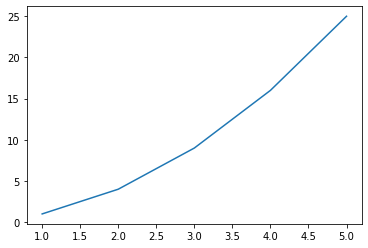

In [ ]:
plt.plot(x, y)

## Basic plots

* Line plot
* Bar plot
* Scatter plot
* Bubble plot
* Stacked plot
* Pie plot
* Table chart
* Polar plot
* Histogram
* Box plot
* Violin plot
* Heatmap
* Hinton diagram
* Images
* Contour plt
* Triangulations
* Stream plot
* Path

### Line plot

Usado para representar la relación entre dos variables continuas. Tipicamente para mostrar la tendencia de una variable en el tiempo, tal como el PBI, inflación, tasas de interés, precios, etc. Los ejemplos que vimos hasta ahora fueron line plots.

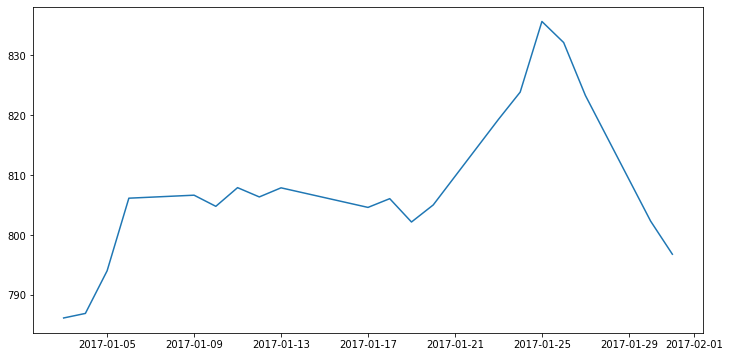

In [ ]:
stock = pd.read_csv(
  "https://raw.githubusercontent.com/Parasgr7/Google-Stock-Price-Prediction/master/Google_Stock_Price_Test.csv",
)

stock["Date"] = pd.to_datetime(stock["Date"], format='%m/%d/%Y')
indexed_stock = stock.set_index("Date")
ts = indexed_stock["Close"]

plt.figure(figsize=(12, 6))
plt.plot(ts)


## Ejercicios

1) Hacer gráficos similares al punto anterior pero respecto al precio de  apertura, el precio máximo, el precio mínimo y el volumen tradeado. 

## Bar plot

Gráficos que usan barras para comparar diferentes categorías de datos. Las barras pueden mostrarse vertical u horizontalmente según sea el eje usado para la variable categórica. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [ ]:
plt.xticks?

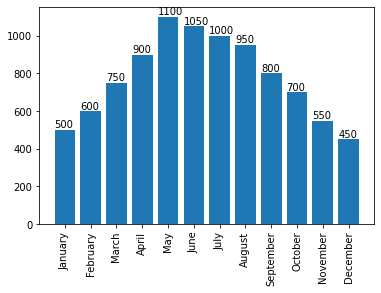

In [ ]:
month_number = range(12)
units_sold = (500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450)

_, ax = plt.subplots()
plt.xticks(month_number, calendar.month_name[1:13], rotation=90) # set names
plot = ax.bar(month_number, units_sold)
for rect in plot:
  height = rect.get_height()
  ax.text(
      rect.get_x() + rect.get_width()/2,
      1.002 * height,
      '%d' % int(height),
      ha='center',
      va='bottom'
  )
  # ha -> horizontal aligment
  # va-> vertical aligment
  
plt.show()


In [ ]:
plt.subplots?
plt.xticks?
ax.text?

*plt.subplots()* nos permite definir el layout del figure en término del número de gráficos y como estarán organizados. En este caso lo usamos para tener acceso al axes para poder anotarlo directamente (con los labels de cada barra, por ej).

## Ejercicios

2) Adaptar el gráfico anterior para que muestre las barras de manera horizonal. Pista: junto a los demás cambios deberán usar `plt.barh()` en lugar de `plt.bar()`

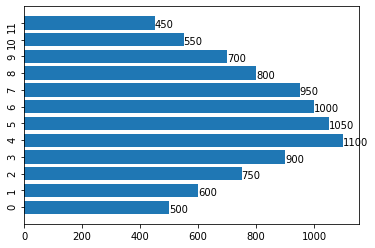

In [ ]:
month_number = range(12)
units_sold = (500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450)

_, ax = plt.subplots()
plt.yticks(month_number, rotation=90) # set names
plot = ax.barh(month_number, units_sold)
for rect in plot:
  width = rect.get_width()
  ax.text(
      width,
      rect.get_y(),
      '%d' % int(width),
      ha='left',
      va='bottom'
  )
  # ha -> horizontal aligment
  # va-> vertical aligment
  
plt.show()

In [ ]:
ax.text?

## Scatter plot

Usado para comparar la distribución de dos variables para ver si existe alguna correlación entre ellas. Si existen clusters en la data, serán fáciles de ver usando este gráfico. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Weight')

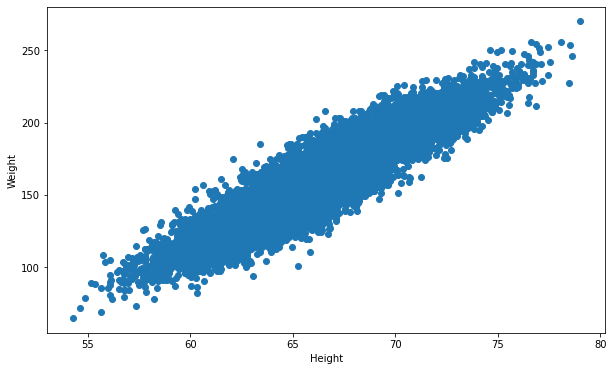

In [ ]:
plt.figure(figsize=(10,6)) # inches

height_weight = pd.read_csv("https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")
x = height_weight["Height"]
y = height_weight["Weight"]
plt.scatter(x, y)
plt.xlabel("Height")
plt.ylabel("Weight")

Veamos otro ejemplo: Iris.

Iris es el dataset más viejo conocido. Introducido en 1936 por Ronald Fisher.
El dataset tiene 50 ejemplos de cada una de las 3 especies de Iris.
Cada ejemplo tiene 4 atributos: el largo y ancho en centímetros del pétalo y del sépalo.
Es un dataset ampliamente utilizado en Machine Learning para clasificación y clustering.


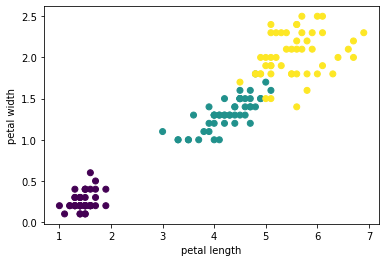

In [ ]:

iris = pd.read_csv(
    'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
)
iris['variety'] = iris['variety'].map(
    {"Setosa" : 0, "Versicolor": 1, "Virginica": 2}
)
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.scatter(iris["petal.length"], iris["petal.width"], c=iris['variety'])

## Bubble plot

Se lo dibuja usando el mismo método `scatter()`. Es otra representación de un *scatter plot* donde cada punto se muestra como una burbuja. Cada una de las burbujas pueden ser mostradas con diferentes colores y tamaños.

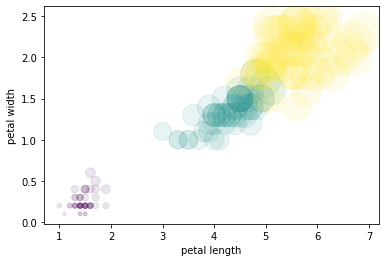

In [ ]:
iris = pd.read_csv(
    'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
)
iris['variety'] = iris['variety'].map(
    {"Setosa" : 0, "Versicolor": 1, "Virginica": 2}
)
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.scatter(iris["petal.length"],
            iris["petal.width"],
            c=iris['variety'],
            s=100*iris["petal.length"]*iris["petal.width"], # area de la burbuja
            alpha=0.1)

In [ ]:
plt.scatter?

##Stacked plot

Muestra el área debajo de un *line plot*. Cuando existen varios *line plots* se apilan uno sobre otro. Se usan para brindar una visualización del efecto acumulativo de multiples variables respecto al eje y.


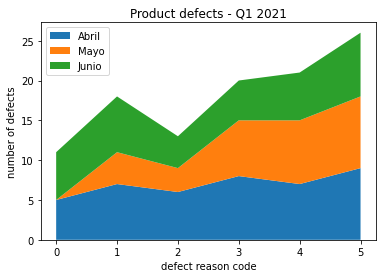

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(range(6)) # codigos de defecto
# Ejemplo: número de defectos (por codigo de defecto) 
# encontrados en determinado producto, por mes

apr = [5, 7, 6, 8, 7, 9]
may = [0, 4, 3, 7, 8, 9]
june = [6, 7, 4, 5, 6, 8]

labels = ["Abril", "Mayo", "Junio"]

_, ax = plt.subplots()

ax.stackplot(x, apr, may, june, labels=labels)
ax.legend(loc='upper left')
plt.xlabel('defect reason code')
plt.ylabel('number of defects')
plt.title('Product defects - Q1 2021')
plt.show()

In [ ]:
ax.legend?

## Pie plot

Usado para representar la contribución de varios grupos/categorías a un cierto total. Por ejemplo, la contribución de cada provincia al PBI, porcentaje de una cierta nota respecto a un grupo de estudiantes, la distribución del gasto mensual de una familia en educación, alimento, etc.

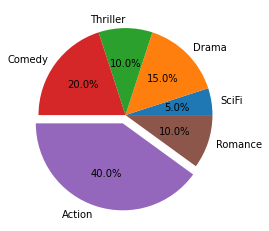

In [ ]:
import matplotlib.pyplot as plt
labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
sizes = [5, 15, 10, 20, 40, 10] # Juntas suman el 100%
explode = (0, 0, 0, 0, 0.1, 0) # solo "explode" la categoría 'Action'
plt.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%' )
plt.show()

In [ ]:
plt.pie?

## Table chart

Una combinación de un bar chart y una table, representando la misma información. Es una combinación de una representación pictórica con la información correspondiente en una tabla.

Veremos un ejemplo con el número de baterías vendidas en cada año, con diferentes valores de amperes/hora. Habrán dos variables categóricas: año y amperes/hora y una variable numérica: cantidad de baterías vendidas.

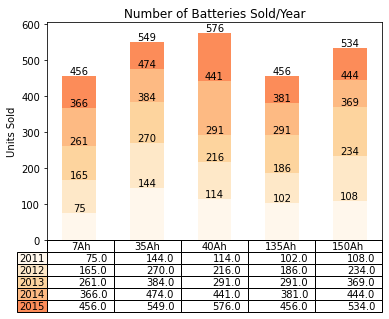

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

years = ['2011', '2012', '2013', '2014', '2015']
ah = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')
data = [[75, 144, 114, 102, 108], [90, 126, 102, 84, 126], 
        [96, 114, 75, 105, 135], [105, 90, 150, 90, 75], 
        [90, 75, 135, 75, 90]]

values = np.arange(0, 600, 100)

colors = plt.cm.OrRd(np.linspace(0, 0.5, len(years))) # Vamos a mostrar cada año con un color distinto

index = np.arange(len(ah)) # La ubicación de cada barra en el eje x.
bar_width = 0.5

y_offset = np.zeros(len(ah))

_, ax = plt.subplots()
cell_text = []

n_years = len(data)
for year in range(n_years):
    plot = plt.bar(index,
                   data[year],
                   bar_width,
                   bottom=y_offset, 
                   color=colors[year])
    y_offset = y_offset + data[year]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
    # En cada iteración de este for, se etiquetará cada barra con el valor correspondiente 
    # a ese año
    for rect in plot:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' 
                % int(y_offset[i]), 
                ha='center', va='bottom')
        i = i+1 

plt.table(cellText=cell_text, rowLabels=years, rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")

plt.xticks([])
plt.title('Number of Batteries Sold/Year')

plt.show()


In [ ]:
plt.bar?

## Histogram

Usado para mostrar la distribución de una variable continua. Los valores de dicha variable continua se separan en un número dado de bins y dibujado sobre el eje *x*. La cantidad de los valores que caen dentro de cada bin se proyecta respecto al eje *y*. Sobre el eje y, también podríamos mostrar un porcentaje del total, como para mostrar una distribución probabilística. Veamos un ejemplo: cantidad de años de experiencia de un grupo de candidatos para un puesto.



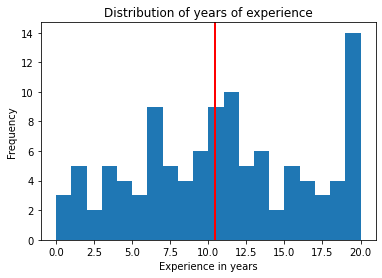

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

exp = np.array([12, 15, 13, 20, 19, 20, 11, 19, 11, 12, 19, 13, 12, 
                10, 6, 19, 3, 1, 1, 0, 4, 4, 6, 5, 3, 7, 12, 7, 9, 
                8, 12, 11, 11, 18, 19, 18, 19, 3, 6, 5, 6, 9, 11, 
                10, 14, 14, 16, 17, 17, 19, 0, 2, 0, 3, 1, 4, 6, 
                6, 8, 7, 7, 6, 7, 11, 11, 10, 11, 10, 13, 13, 15, 
                18, 20, 19, 1, 10, 8, 16, 19, 19, 17, 16, 11, 1, 
                10, 13, 15, 3, 8, 6, 9, 10, 15, 19, 2, 4, 5, 6, 9, 
                11, 10, 9, 10, 9, 15, 16, 18, 13])

nbins = 20
plt.hist(exp, bins = nbins)

plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of years of experience")

plt.axvline(x=exp.mean(), linewidth=2, color = 'r')

plt.show()

## Reading and displaying images

`matplotlib.pyplot` nos permite leer imágenes `.jpeg` and `.png`.


Dimensions of the image:  (600, 800, 4)


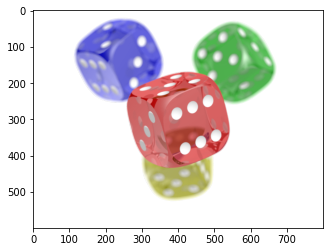

In [ ]:
 import matplotlib.pyplot as plt

image = plt.imread("https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png")
print("Dimensions of the image: ", image.shape) # 4 canales desde que es RGB-A
plt.imshow(image)
plt.show()

## Heatmap

Usados para visualizar rangos de datos en diferentes colores y con intensidad variable. Muy usado para dibujar matrices de correlación entre variables. Los elementos de una matriz de correlación indican el grado de la relación entre 2 variables. La matriz contiene valores para todas las combinaciones de atributos de los datos de entrada. Si los datos de entrada tienen 5 atributos, la matriz de correlación será de una matriz de 5x5.

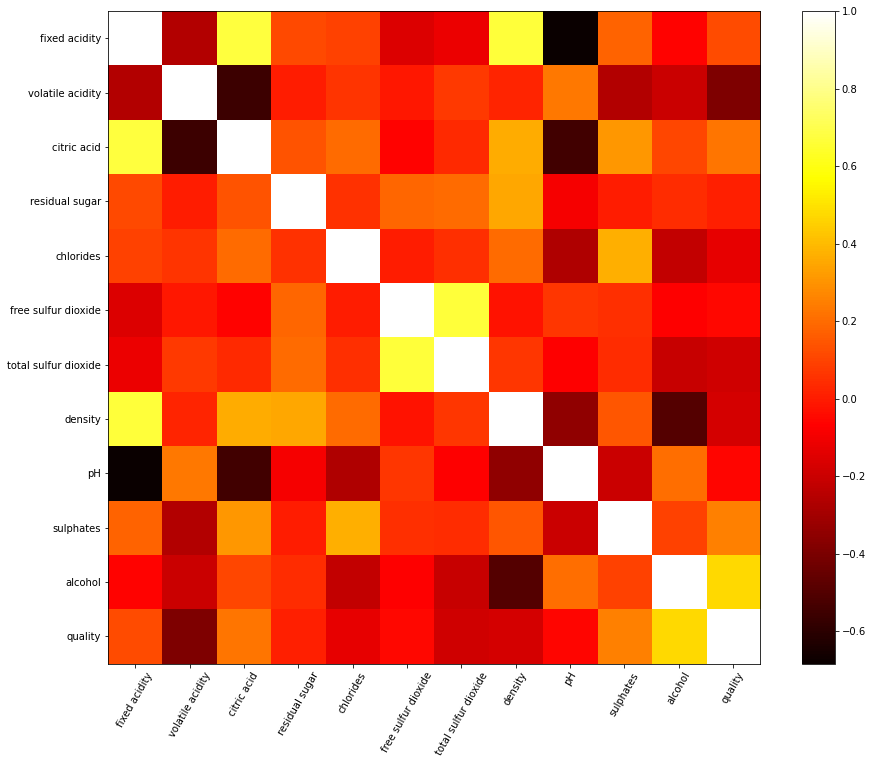

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

wine_quality = pd.read_csv(
    "https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv",
    delimiter=";"
)
corr = wine_quality.corr()
plt.figure(figsize=(15,12))
plt.imshow(corr, cmap='hot')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=60)
plt.yticks(range(len(corr)),corr.columns)
plt.show()